<a href="https://colab.research.google.com/github/thual/PBLClimate/blob/main/PCAinR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component anaysis in $\mathbb R^2$
## Olivier THUAL, Toulouse INP, 06/02/2023

## Construction of a random vector

We construct a cloud of random points in $\mathbb R^2$ by first choosing to orthornomal vectors $\underline \phi_1\in \mathbb R^2$ and $\underline \phi_1\in \mathbb R^2$ : 
$$\underline \phi_1 \cdot \underline \phi_2 = 0\;, \quad ||\underline \phi_1 || =1 \quad \hbox{and} \quad  ||\underline \phi_2 || =1 \;. $$

We then choose the gaussian random variables $u_1$ and $u_2$ of zero mean and root mean square $a_1$ and $a_2$ respectively. We choose  $\underline X_{m} = \left( \begin{matrix} x_{m} \cr y_{m} \end{matrix} \right)$ a point in $\mathbb R^2$. With these choices, we consider the random vector:
$$ \underline X = \underline X_{m} + u_1 \, \underline \phi_1 +  u_2 \, \underline \phi_2\;.$$

## Cloud of points with $N$ samples

We now consider $N$ samples of the random vecteur by drawing $N$ samples $u_1^{(n)}$ of the random variable $u_1$ and $N$ samples  $u_2^{(n)}$ of the random variable $u_2$:
$$ \hbox{Random drawing of} \quad u_1^{(n)} \quad \hbox{and} \quad u_2^{(n)} \quad \hbox{for n=1,...,N}\;.$$
This gives a cloud for $N$ points in $\mathbb R^2$:
$$\underline X^{(n)} = u_1^{(n)} \, \underline \phi_1 + u_2^{(n)} \, \underline \phi_2\;.$$






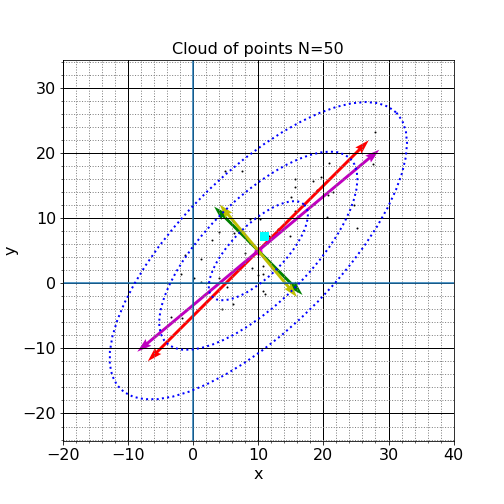

## Principal component analysis

With these $N$ points in $\mathbb R^2$, we want to recover an estimation of $\underline X_m$, $a_1$, $a_2$ and the directions of $\underline {\phi}_1$ and $\underline {\phi}_2$. 

The estimate of the mean is given by:
$$ \underline X_{em}= {1\over N} \sum_{n=1}^N \underline X^{(r)}\;$$

To estimate to others quantities, with firt construct the deviations to the estimated mean:
$$\underline{\widetilde X}^{(r)} = \underline X^{(r)}- \underline X_{em}\;.$$
We then construct an estimation of the covariance matrix:
$$ \underline{\underline A } = {1\over N-1} \sum_{n=1}^N \underline {\widetilde X}^{(r)} \;\underline {\widetilde X}^{(r)T} \,$$
where $\underline {\widetilde X}^{(r)T}$ is the transpose of $\underline {\widetilde X}^{(r)}$. 

The eigenvalues of $\underline{\underline A }$ give an estimation of $a_1$ and $a_2$ and its eigenvectors give an estimation of the directions of  $\underline \phi_1$ and $\underline \phi_2$.

The following program illustrates these results. 

## References


*   Principal component analysis, Wikipedia,  https://en.wikipedia.org/wiki/

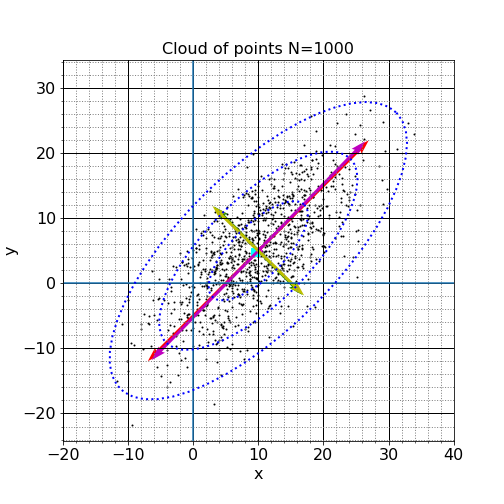

# Question 1

**Question 1.** Explain why the eigenvalues and eigenvectors of $\underline{\underline A }$ give an estimation of $a_1$, $a_2$, $\underline {\phi}_1$ and $\underline {\phi}_2$.

**Answer 1.**

*Write the answer here!*

# Subroutines

First run this first part of the program to set up the libraries and subroutines!

*  Colab : ⌘/Ctrl+F9 to execute all cells
*  MyBinder : -> Run -> "Run all cells"

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
print("PAC in R2")


def expe(r):
    # Experiment for PCA in R2

    # Random amplitudes
    u1=a1*np.random.normal(0,1,N).reshape(1,N)
    u2=a2*np.random.normal(0,1,N).reshape(1,N)
    
    # Cloud of points
    Xmean=np.array([xmean,ymean]).reshape(2,1)
    X=Xmean+phi1@u1+phi2@u2
    
    # Init figure
    plt.figure(1,figsize=(7,7))
    ax=plt.subplot(1,1,1)  
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    plt.xticks(fontsize=16); plt.yticks(fontsize=16);  
    plt.title("Cloud of points N="+str(N),fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("x",fontsize=16); plt.ylabel("y",fontsize=16)

    
    # Plot the cloud of points
    plt.scatter(X[0,:],X[1,:],marker='o',color='black',s=1)
    plt.scatter(Xmean[0],Xmean[1],marker='o',color='magenta',s=50)
    
    # Ellipses
    Ns=50; th=np.linspace(0,2*np.pi,Ns).reshape(1,Ns)
    Xs=a1*phi1@np.cos(th)+a2*phi2@np.sin(th)
    for i in range(1,4):
        ax.plot(Xmean[0]+i*Xs[0,:],Xmean[1]+i*Xs[1,:],color='b',linestyle='dotted',linewidth=2)
    
    # Plot the principal directions
    ax.axis('equal')
    ax.quiver(xmean,ymean,p*a1*phi1[0],p*a1*phi1[1],angles='xy',color='r',scale=5,linestyle='dashed')
    ax.quiver(xmean,ymean,p*a2*phi2[0],p*a2*phi2[1],angles='xy',color='g',scale=5)
    ax.quiver(xmean,ymean,-p*a1*phi1[0],-p*a1*phi1[1],angles='xy',color='r',scale=5,linestyle='dashed')
    ax.quiver(xmean,ymean,-p*a2*phi2[0],-p*a2*phi2[1],angles='xy',color='g',scale=5)
   
       
    ## Find the eigenvectors and eigenvalues back
    
    # Estimation of the mean
    eXmean=np.mean(X,axis=1).reshape(2,1)
    ax.scatter(eXmean[0],eXmean[1],marker='s',color='cyan',s=50)
    #err=np.linalg.norm(eXmean-Xmean)/np.linalg.norm(Xmean)
    #print("N=",N,", Mean estimation of X=",eXmean,", Error=",err)
    
    # Principal Component analysis
    Xtil=X-eXmean
    matA=Xtil@Xtil.transpose()/(N-1)
    val, vect = np.linalg.eig(matA)
    j1=np.argmax(val);j2=np.argmin(val)
    
    
    ea1=np.sqrt(val[j1]); ea2=np.sqrt(val[j2]);
    #era1=abs(ea1-a1)/abs(a1); era2=abs(ea2-a2)/abs(a2)
    #print("estimation eigenvalue 1: ea1=",ea1,"era1=",era1)
    #print("estimation eigenvalue 2: : ea2=",ea2,"era2=",era2)
    
    ephi1=vect[:,j1]; ephi2=vect[:,j2]
    #erphi1=np.linalg.norm(ephi1-phi1)/np.linalg.norm(phi1)
    #print("estimation eigenvector 1: ephi1=",ephi1,"erphi1=",erphi1)
    #erphi2=np.linalg.norm(ephi2-phi2)/np.linalg.norm(phi2)
    #print("estimation eigenvector 2: ephi2=",ephi2,"erphi2=",erphi2)
    
    
    # Principal directions
    ax.quiver(xmean,ymean,p*ea1*ephi1[0],p*ea1*ephi1[1],angles='xy',linestyle='dashed',color='m',scale=5)
    ax.quiver(xmean,ymean,p*ea2*ephi2[0],p*ea2*ephi2[1],angles='xy',color='y',scale=5)
    ax.quiver(xmean,ymean,-p*ea1*ephi1[0],-p*ea1*ephi1[1],angles='xy',linestyle='dashed',color='m',scale=5)
    ax.quiver(xmean,ymean,-p*ea2*ephi2[0],-p*ea2*ephi2[1],angles='xy',color='y',scale=5)
    
    plt.xlim(xmin,xmax); plt.ylim(ymin,ymax)
    plt.savefig("R2PCA"+str(r)+".png")
    plt.show()

# Question 2

**Question 2.** Explore several values of $N$ in the program below and ajust the number of experiments $R$ to observe the accuracy of the estimations. How many point do one needs to get a "good" accuracy? What is the minimum number of point to get a "reasonable" accuracy. Explicit your answer.

**Answer 2.**

*Write the answer here!*

# Parameters to change

The following parameters can be changed:

*  `N` : Number of points of the cloud
*  `R` : Number of experiments
*  `xmean, ymean` : Coordinate of $\underline X_{m}$
*  `a1, a2` : Root mean square of the gaussian random variable $u_1$ and $u_2$ 
*  `phi1, phi2` : Vectors $\underline{\phi_1}$ and $\underline{\phi_2}$



In [ ]:
# Parameters that can be changed
N=50 # Number of samples for the cloud
R=10 # Number of experiments
xmean=10; ymean=5; # Coordinates of the mean
a1=10; a2=4; # Root mean square in the orthogonal directions
# Principal directions
phi1=np.array([1,1]).reshape(2,1)/np.sqrt(2)
phi2=np.array([1,-1]).reshape(2,1)/np.sqrt(2)

# Derived parameters
p=.2 # Scale for the vectors
L=3*a1  # Lenth for the plot limits
xmin=np.round(xmean-L,10); # Plot limits
xmax=np.round(xmean+L,10); # Plot limits
ymin=np.round(ymean-L,10); # Plot limits
ymax=np.round(ymean+L,10); # Plot limits

# Loop on the experiments
for r in range(0,R):
    print("Experiment r=",r)
    expe(r)


# Question 3

**Question 3.** Write a similar program in $\mathbb R^3$. One can choose
$$\underline{\phi}_1= {1\over \sqrt 2} \left( \begin{matrix} 1\cr 1\cr 0 \end{matrix} \right),\; \underline{\phi}_2= {1\over \sqrt 2} \left( \begin{matrix} 1\cr -1\cr 0 \end{matrix} \right)\quad \hbox{and} \quad \underline{\phi}_3= \left( \begin{matrix} 0\cr 0\cr 1 \end{matrix} \right), $$
or any other choice of orthormal basis. The choice of three positive values $(a_1, a_2, a_3)$ is arbitray. 

**Answer 3.**

*Write your program below and execute it!*